# Exercise - Visualize MNIST with PCA

The goal of this exercise is to **create a 2-dimensional representation of the MNIST images using PCA** and obtain something similar to the [Google Projector interface](http://projector.tensorflow.org/) in 2d.

To achieve this, we will load the images, compute the first two principal components and create a 2-dimensional plot of a subset of the data ex. 500 images.

### Load data: Load the ten thousand images and their labels from 'mnist-10k.npz'



In [11]:
import numpy as np
with np.load('Course 4\mnist-10k.npz', allow_pickle=False) as npz_file:
    # Load the arrays
    #x = npz_file['features']
    #y = npz_file['targets']
    data = dict(npz_file.items())

#print('x:', x) # [6.28, 2.719, 1.]
#print('y:', y) # [2, 3, 5]

In [14]:
data['data'].shape

(10000, 784)

In [18]:
data['labels'].shape

(10000,)

In [21]:
X = data['data']
y = data['labels']

In [25]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=2)

# Apply PCA
pca.fit(X, y=None); # Unsupervised learning, no y variable

In [37]:
# Compute component score of 500 images
digits_components = pca.transform(X[:500,:])
digits_label = y[:500]

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

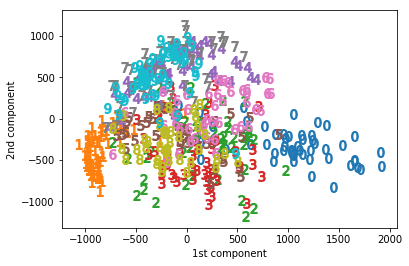

In [44]:
# Group imags by digits
for label in range(10):
    idx = (digits_label == label)
    
    plt.scatter(
        digits_components[idx,0], digits_components[idx,1],
        marker = "${}$".format(label),
        s=100 # Size of each marker
        	)

# Add legend and labels
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

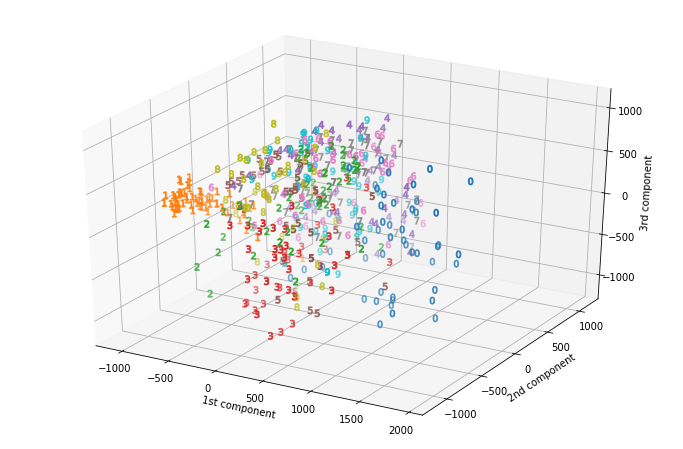

In [45]:
from mpl_toolkits.mplot3d import Axes3D

# Compute first three principal components
pca3d = PCA(n_components=3)
pca3d.fit(X)

# Plot a subset of the points
N = 500
digits_components3d = pca3d.transform(X[:N])
digits_label3d = y[:N]

# Create 3d plot with Matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Group images by digit
for label in range(10): # 0,1,2,3..9
    # Images of this digit
    idx = (digits_label3d == label)

    # Plot images
    ax.scatter3D(
        digits_components3d[idx, 0], digits_components3d[idx, 1], digits_components3d[idx, 2],
        # Use digits as markers
        # Take a look at https://stackoverflow.com/a/17291915/3890306
        marker="${}$".format(label),
        s=50 # Size of each marker
    )

# Add legend and labels
ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')
plt.show()